# **00_SetUp**

In [ ]:
!pip install geopandas
!pip install osmnx

In [ ]:
import requests
import json
import time
import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np
import os

In [ ]:
root = ''

# **01_URLs & Tags**

In [ ]:
#Placename
vienna='Vienna, 1010, Austria '

In [ ]:
#tags
wine_dine_tag={'amenity':['bar','pub', 'cafe', 'restaurant', 'fast_food','biergarten', 'food_court', 'ice_cream', 'arts_cemter', 'nightclub', 'brothel', 'casino', 'cinema', 'gambling', 'stripclub', 'swingerclub', 'theatre']}
leisure_tag= {'leisure':True}
shopping_tag={'shop': ['clothes','bags','jewelery', 'fashion_accessories', 'fabric', 'leather', 'shoes', 'watches', 'beauty', 'cosmetics', 'hairdresser', 'perfumery', 'tattoo', 'florist','chocolate', 'garden_centre', 'houseware', 'antiques', 'electronics', 'mobile_phones', 'candles', 'carpet' 'mall, boutique']} #for POI analysis
shop_tag={'shop':True} #for analysis
religion_tag={'amenity':'place_of_worship', 'religion':True}
tourism_tag={'tourism':True}

# **02_Analysis**

In [ ]:
wine_dine=ox.geometries.geometries_from_place(vienna, tags=wine_dine_tag)
leisure = ox.geometries.geometries_from_place(vienna, tags=leisure_tag)
shop = ox.geometries.geometries_from_place(vienna, tags=shop_tag)
tourism_ox=ox.geometries.geometries_from_place(vienna, tags=tourism_tag)

# religion_ox=ox.geometries.geometries_from_place(vienna, tags=religion_tag)

## Check POIs

In [ ]:
wine_dine['type']='wine_dine'
print(wine_dine.shape)
wine_dine.head(2)

(6143, 379)


addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                            
node         29801740      Wien           AT              130          1020   
             46823888      Wien           AT               38          1150   

                       addr:street     amenity       brand brand:wikidata  \
element_type osmid                                                          
node         29801740   Handelskai   fast_food  McDonald's         Q38076   
             46823888  Selzergasse  restaurant         NaN            NaN   

                      brand:wikipedia   cuisine  ... name:kr name:he rental  \
element_type osmid                               ...                          
node         29801740   en:McDonald's    burger  ...     NaN     NaN    NaN   
             46823888             NaN  regional  ...     NaN     NaN    NaN   

                      shelter_type disused:brand disused:opening_hours  \
element_type osmid                                                       
node         29801740          NaN           NaN                   NaN   
             46823888          NaN           NaN                   NaN   

                      disused:operator source:geometry ways       type  
element_type osmid                                                      
node         29801740              NaN             NaN  NaN  wine_dine  
             46823888              NaN             NaN  NaN  wine_dine  

[2 rows x 379 columns]

In [ ]:
leisure['type'] = 'leisure'
print(leisure.shape)
leisure.head(2)

(11818, 316)


source                   geometry barrier bicycle foot  \
element_type osmid                                                              
node         83453802     NaN  POINT (16.40419 48.27470)     NaN     NaN  NaN   
             254640433    NaN  POINT (16.31869 48.19869)     NaN     NaN  NaN   

                       highway addr:city addr:country addr:housenumber  \
element_type osmid                                                       
node         83453802      NaN       NaN          NaN              NaN   
             254640433     NaN      Wien           AT               65   

                       addr:postcode  ... name:he name:ka name:lt     type  \
element_type osmid                    ...                                    
node         83453802            NaN  ...     NaN     NaN     NaN  leisure   
             254640433          1150  ...     NaN     NaN     NaN  leisure   

                       name_1 esperanto meadow note:opening_hours  \
element_type osmid                                                  
node         83453802     NaN       NaN    NaN                NaN   
             254640433    NaN       NaN    NaN                NaN   

                       note:opening_hours:1 note:opening_hours:2  
element_type osmid                                                
node         83453802                   NaN                  NaN  
             254640433                  NaN                  NaN  

[2 rows x 316 columns]

In [ ]:
shop['type']='shop'
print(shop.shape)
shop.head(2)

(10593, 475)


addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                            
node         15079903      Wien           AT              180          1140   
             15080180      Wien           AT             130B          1140   

                               addr:street  atm       brand brand:wikidata  \
element_type osmid                                                           
node         15079903  Hütteldorfer Straße  yes    Eurospar      Q12309283   
             15080180  Hütteldorfer Straße  NaN  Billa Plus            NaN   

                      brand:wikipedia        name  ... shop:car_repair  \
element_type osmid                                 ...                   
node         15079903     da:Eurospar    Eurospar  ...             NaN   
             15080180        de:Billa  Billa Plus  ...             NaN   

                      source:geometry area changing_table:count  \
element_type osmid                                                
node         15079903             NaN  NaN                  NaN   
             15080180             NaN  NaN                  NaN   

                      disused:opening_hours disused:brand:wikidata  \
element_type osmid                                                   
node         15079903                   NaN                    NaN   
             15080180                   NaN                    NaN   

                      disused:brand:wikipedia recycling:batteries ways  \
element_type osmid                                                       
node         15079903                     NaN                 NaN  NaN   
             15080180                     NaN                 NaN  NaN   

                      loc_name  
element_type osmid              
node         15079903      NaN  
             15080180      NaN  

[2 rows x 475 columns]

In [ ]:
tourism_ox['type']='tourism'
print(tourism_ox.shape)
tourism_ox.head(2)

(3052, 370)


barrier foot                   geometry highway  \
element_type osmid                                                      
node         60438337     NaN  NaN  POINT (16.36826 48.20464)     NaN   
             60571580     NaN  NaN  POINT (16.33669 48.27439)     NaN   

                      addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                            
node         60438337      Wien           AT                1          1010   
             60571580       NaN          NaN              NaN           NaN   

                          addr:street      amenity  ... government  \
element_type osmid                                  ...              
node         60438337  Albertinaplatz  arts_centre  ...        NaN   
             60571580             NaN          NaN  ...        NaN   

                      building:start_date name:restaurant castle_type:fr  \
element_type osmid                                                         
node         60438337                 NaN             NaN            NaN   
             60571580                 NaN             NaN            NaN   

                      castle_type:it is_in:theme_park old_name:en  \
element_type osmid                                                  
node         60438337            NaN              NaN         NaN   
             60571580            NaN              NaN         NaN   

                      breakfast:buffet language:de language:en  
element_type osmid                                              
node         60438337              NaN         NaN         NaN  
             60571580              NaN         NaN         NaN  

[2 rows x 370 columns]

In [ ]:
# religion_ox['type'] = 'religion'
# print(religion_ox.shape)
# religion_ox.head(2)

## Merge

In [ ]:
merged_list=pd.concat([wine_dine, leisure, shop, tourism_ox])

In [ ]:
reduced = merged_list.drop_duplicates(subset=['name'], keep='first')

In [ ]:
print(merged_list.shape)
print(reduced.shape)

(31606, 901)
(15156, 901)


In [ ]:
reduced.head(5)

addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                            
node         29801740      Wien           AT              130          1020   
             46823888      Wien           AT               38          1150   
             46823910      Wien           AT               13          1150   
             46823914      Wien           AT               11          1150   
             46823918       NaN          NaN              NaN           NaN   

                        addr:street     amenity       brand brand:wikidata  \
element_type osmid                                                           
node         29801740    Handelskai   fast_food  McDonald's         Q38076   
             46823888   Selzergasse  restaurant         NaN            NaN   
             46823910  Meiselstraße  restaurant         NaN            NaN   
             46823914  Meiselstraße        cafe         NaN            NaN   
             46823918           NaN   fast_food         NaN            NaN   

                      brand:wikipedia   cuisine  ... townhall:type  \
element_type osmid                               ...                 
node         29801740   en:McDonald's    burger  ...           NaN   
             46823888             NaN  regional  ...           NaN   
             46823910             NaN     pizza  ...           NaN   
             46823914             NaN       NaN  ...           NaN   
             46823918             NaN     asian  ...           NaN   

                      building:start_date name:restaurant castle_type:fr  \
element_type osmid                                                         
node         29801740                 NaN             NaN            NaN   
             46823888                 NaN             NaN            NaN   
             46823910                 NaN             NaN            NaN   
             46823914                 NaN             NaN            NaN   
             46823918                 NaN             NaN            NaN   

                      castle_type:it is_in:theme_park old_name:en  \
element_type osmid                                                  
node         29801740            NaN              NaN         NaN   
             46823888            NaN              NaN         NaN   
             46823910            NaN              NaN         NaN   
             46823914            NaN              NaN         NaN   
             46823918            NaN              NaN         NaN   

                      breakfast:buffet language:de language:en  
element_type osmid                                              
node         29801740              NaN         NaN         NaN  
             46823888              NaN         NaN         NaN  
             46823910              NaN         NaN         NaN  
             46823914              NaN         NaN         NaN  
             46823918              NaN         NaN         NaN  

[5 rows x 901 columns]

In [ ]:
reduced.columns.values

array(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'amenity', 'brand', 'brand:wikidata',
       'brand:wikipedia', 'cuisine', 'name', 'opening_hours', 'takeaway',
       'toilets:wheelchair', 'wheelchair', 'geometry', 'contact:website',
       'indoor_seating', 'outdoor_seating', 'phone', 'website',
       'diet:vegetarian', 'smoking', 'cinema:3D', 'level', 'payment:cash',
       'payment:credit_cards', 'payment:maestro', 'screen', 'wikidata',
       'wikipedia', 'name:en', 'operator', 'wheelchair:description',
       'alt_name', 'note', 'short_name', 'closed', 'delivery', 'shop',
       'source', 'fax', 'fixme', 'changing_table', 'email',
       'internet_access', 'microbrewery', 'name:ru', 'name:zh', 'brewery',
       'contact:email', 'contact:phone', 'internet_access:fee',
       'description', 'created_by', 'name:de', 'contact:facebook',
       'description:covid19', 'opening_hours:covid19', 'sport',
       'addr:unit', 'description:en', 

In [ ]:
osm_poi = reduced.loc[:, [ 'name', 'addr:street', 'amenity', 'leisure', 'shop', 'tourism', 'geometry']]
osm_poi.head()

name   addr:street     amenity leisure  \
element_type osmid                                                              
node         29801740            McDonald's    Handelskai   fast_food     NaN   
             46823888   Heidingers Gasthaus   Selzergasse  restaurant     NaN   
             46823910    Pizzeria Ramazotti  Meiselstraße  restaurant     NaN   
             46823914  Meiselmarkt Cafe-Pub  Meiselstraße        cafe     NaN   
             46823918         Lucky Noodles           NaN   fast_food     NaN   

                      shop tourism                   geometry  
element_type osmid                                             
node         29801740  NaN     NaN  POINT (16.39496 48.23346)  
             46823888  NaN     NaN  POINT (16.32300 48.19823)  
             46823910  NaN     NaN  POINT (16.32054 48.19748)  
             46823914  NaN     NaN  POINT (16.32087 48.19746)  
             46823918  NaN     NaN  POINT (16.32126 48.19753)

## Classify

Identify different classes in OSM data

### Gender

#### Gay locations

In [ ]:
g=[]
for j in reduced.columns.values:
  if ('gay' in j) | ('gay:men' in j) | ('gay:women' in j) | ('gay:transgender' in j) | ('fetish:leather' in j):
    v=reduced[j].str.contains('yes|primary|welcome|only', regex=True, na=False)
    g.append(v)
l=np.sum(g,axis=0)
print(l)
l.shape


[0 0 0 ... 0 0 0]


(15156,)

In [ ]:
osm_poi['lgbtq_friendly'] = l>=1
lgbtq_friendly=osm_poi[osm_poi['lgbtq_friendly']==True].loc[:,'name':'tourism']
print(lgbtq_friendly.shape)
osm_poi.head(2)

(20, 6)


name  addr:street     amenity leisure  \
element_type osmid                                                            
node         29801740           McDonald's   Handelskai   fast_food     NaN   
             46823888  Heidingers Gasthaus  Selzergasse  restaurant     NaN   

                      shop tourism                   geometry  lgbtq_friendly  
element_type osmid                                                             
node         29801740  NaN     NaN  POINT (16.39496 48.23346)           False  
             46823888  NaN     NaN  POINT (16.32300 48.19823)           False

#### Male

In [ ]:
g=[]
for j in reduced.columns.values:
  if ('male' in j) | ('gay:men' in j) | ('unisex' in j):
    v=reduced[j].str.contains('yes|primary|welcome|only|male', regex=True, na=False)
    g.append(v)
v = [True if (i=='male') else False for i in reduced.access.values]
g.append(v)
v= [True if (i=='barber') else False for i in reduced.shop.values]
g.append(v)
m=np.sum(g,axis=0)
print(l)
m.shape

[0 0 0 ... 0 0 0]


(15156,)

In [ ]:
osm_poi['men_friendly'] = m>=1
men_friendly=osm_poi[osm_poi['men_friendly']==True].loc[:,'name':'tourism']
print(men_friendly.shape)
osm_poi.head(2)

(19, 6)


name  addr:street     amenity leisure  \
element_type osmid                                                            
node         29801740           McDonald's   Handelskai   fast_food     NaN   
             46823888  Heidingers Gasthaus  Selzergasse  restaurant     NaN   

                      shop tourism                   geometry  lgbtq_friendly  \
element_type osmid                                                              
node         29801740  NaN     NaN  POINT (16.39496 48.23346)           False   
             46823888  NaN     NaN  POINT (16.32300 48.19823)           False   

                       men_friendly  
element_type osmid                   
node         29801740         False  
             46823888         False

#### Female

In [ ]:
g=[]
for j in reduced.columns.values:
  if ('women' in j) | ('gay:women' in j) | ('female' in j) | ('unisex' in j) :
    v=reduced[j].str.contains('yes|primary|welcome|only|female', regex=True, na=False)
    g.append(v)
v = [True if (i=='hairdresser') else False for i in reduced.shop.values]
b = [True if i=='female' else False for i in reduced.access.values]
g.append(v)
g.append(b)
f=np.sum(g,axis=0)
print(l)
f.shape

[0 0 0 ... 0 0 0]


(15156,)

In [ ]:
osm_poi['women_friendly'] = f>=1
women_friendly=osm_poi[osm_poi['women_friendly']==True].loc[:,'name':'tourism']
print(women_friendly.shape)
osm_poi.head(2)

(776, 6)


name  addr:street     amenity leisure  \
element_type osmid                                                            
node         29801740           McDonald's   Handelskai   fast_food     NaN   
             46823888  Heidingers Gasthaus  Selzergasse  restaurant     NaN   

                      shop tourism                   geometry  lgbtq_friendly  \
element_type osmid                                                              
node         29801740  NaN     NaN  POINT (16.39496 48.23346)           False   
             46823888  NaN     NaN  POINT (16.32300 48.19823)           False   

                       men_friendly  women_friendly  
element_type osmid                                   
node         29801740         False           False  
             46823888         False           False

### Ethnicity

In [ ]:
ethnicity = reduced.loc[:, ['name', 'description', 'cuisine','brand','amenity', 'leisure', 'shop']]
ethnicity.head()

name description   cuisine       brand  \
element_type osmid                                                              
node         29801740            McDonald's         NaN    burger  McDonald's   
             46823888   Heidingers Gasthaus         NaN  regional         NaN   
             46823910    Pizzeria Ramazotti         NaN     pizza         NaN   
             46823914  Meiselmarkt Cafe-Pub         NaN       NaN         NaN   
             46823918         Lucky Noodles         NaN     asian         NaN   

                          amenity leisure shop  
element_type osmid                              
node         29801740   fast_food     NaN  NaN  
             46823888  restaurant     NaN  NaN  
             46823910  restaurant     NaN  NaN  
             46823914        cafe     NaN  NaN  
             46823918   fast_food     NaN  NaN

#### Afro_carribean

In [ ]:
african =['african','carribean']
e=[]
for j in reduced.columns.values:
  if ('afrika' in j) | ('Afrika' in j) | ('africa' in j) | ('africa' in j) | ('carribean' in j) | ('jamaica' in j) | ('couscous' in j):
    v = reduced[j].astype(str).str.contains('yes|only', case=False, regex=True, na=False) 
  else:
    v = reduced[j].astype(str).str.contains('africa|afrika|african|couscous|carribean|jollof|fried_rice|fufu|banku|waakye|afro|braids|nigeria|libya|ethiopia|jamaica|ghana|senegalese|maroc|calabash|egypt|amala', case=False, regex=True, na=False)
  e.append(v)
af=np.sum(e,axis=0)
print(l)
af.shape


[0 0 0 ... 0 0 0]


(15156,)

In [ ]:
osm_poi['afro_carribean'] = af>=1
afro_friendly=osm_poi[osm_poi['afro_carribean']==True].loc[:,'name':'tourism']
print(afro_friendly.shape)
osm_poi.head(2)
afro_friendly.head()

(25, 6)


name        addr:street  \
element_type osmid                                                       
node         425488870                  Le Couscous  Bösendorferstraße   
             1207358918         Jamaica Beach (FKK)                NaN   
             1210670891                      Kamala      Hollandstraße   
             1291414393                 Petit Maroc        Neubaugasse   
             1668100065  Rachel's African Sensation          Ennsgasse   

                            amenity leisure shop tourism  
element_type osmid                                        
node         425488870   restaurant     NaN  NaN     NaN  
             1207358918  restaurant     NaN  NaN     NaN  
             1210670891  restaurant     NaN  NaN     NaN  
             1291414393  restaurant     NaN  NaN     NaN  
             1668100065   fast_food     NaN  NaN     NaN

#### Asian

In [ ]:
asi=[]

for j in reduced.columns.values:
  if ('sushi' in j) | ('noodles' in j) | ('kimchi' in j) | ('oriental' in j):
    v = reduced[j].astype(str).str.contains('yes', case=False, regex=True, na=False) 
  else:
    v = reduced[j].astype(str).str.contains('asian|chinese|japanese|thai|sushi|vietnamese|korea|kimchi|dumplings|noodles|ramen', case=False, regex=True, na=False)
  asi.append(v)
asi=np.sum(asi,axis=0)
print(asi)
asi.shape


[0 0 0 ... 0 0 0]


(15156,)

In [ ]:
osm_poi['asian'] = asi>=1
asian_friendly=osm_poi[osm_poi['asian']==True].loc[:,'name':'tourism']
print(asian_friendly.shape)
osm_poi.head(2)

(534, 6)


name  addr:street     amenity leisure  \
element_type osmid                                                            
node         29801740           McDonald's   Handelskai   fast_food     NaN   
             46823888  Heidingers Gasthaus  Selzergasse  restaurant     NaN   

                      shop tourism                   geometry  lgbtq_friendly  \
element_type osmid                                                              
node         29801740  NaN     NaN  POINT (16.39496 48.23346)           False   
             46823888  NaN     NaN  POINT (16.32300 48.19823)           False   

                       men_friendly  women_friendly  afro_carribean  asian  
element_type osmid                                                          
node         29801740         False           False           False  False  
             46823888         False           False           False  False

#### Middle_eastern

In [ ]:
me=[]

for j in reduced.columns.values:
  if ('halal' in j) | ('ramadan' in j) | ('persian' in j) | ('lebanese' in j):
    v = reduced[j].astype(str).str.contains('yes', case=False, regex=True, na=False)
  else:
    v = reduced[j].astype(str).str.contains('arab|halal|Qatar|dubai|saudi|hijab|ramadan|persian|iraq|afghan|lebanese|egypt|maroc|algeria|syria', case=False, regex=True, na=False)
  me.append(v)
me=np.sum(me,axis=0)
print(me)
me.shape


[0 0 0 ... 0 0 0]


(15156,)

In [ ]:
osm_poi['mid_east'] = me>=1
mid_east_friendly=osm_poi[osm_poi['mid_east']==True].loc[:,'name':'tourism']
print(mid_east_friendly.shape)
osm_poi.head(2)

(53, 6)


name  addr:street     amenity leisure  \
element_type osmid                                                            
node         29801740           McDonald's   Handelskai   fast_food     NaN   
             46823888  Heidingers Gasthaus  Selzergasse  restaurant     NaN   

                      shop tourism                   geometry  lgbtq_friendly  \
element_type osmid                                                              
node         29801740  NaN     NaN  POINT (16.39496 48.23346)           False   
             46823888  NaN     NaN  POINT (16.32300 48.19823)           False   

                       men_friendly  women_friendly  afro_carribean  asian  \
element_type osmid                                                           
node         29801740         False           False           False  False   
             46823888         False           False           False  False   

                       mid_east  
element_type osmid               
node         29801740     False  
             46823888     False

#### South Asian

In [ ]:
ind=[]

for j in reduced.columns.values:
  if ('india' in j) | ('curry' in j) | ('hindu' in j):
    v = reduced[j].astype(str).str.contains('yes', case=False, regex=True, na=False)
  else:
    v = reduced[j].astype(str).str.contains('indian|hindu|pakistan|sri lanka|kebab|curry', case=False, regex=True, na=False)
  ind.append(v)
ind=np.sum(ind,axis=0)
print(ind)
ind.shape


[0 0 0 ... 0 0 0]


(15156,)

In [ ]:
osm_poi['south_asian'] = ind>=1
south_asian_friendly=osm_poi[osm_poi['south_asian']==True].loc[:,'name':'tourism']
print(south_asian_friendly.shape)
osm_poi.head(2)

(253, 6)


name  addr:street     amenity leisure  \
element_type osmid                                                            
node         29801740           McDonald's   Handelskai   fast_food     NaN   
             46823888  Heidingers Gasthaus  Selzergasse  restaurant     NaN   

                      shop tourism                   geometry  lgbtq_friendly  \
element_type osmid                                                              
node         29801740  NaN     NaN  POINT (16.39496 48.23346)           False   
             46823888  NaN     NaN  POINT (16.32300 48.19823)           False   

                       men_friendly  women_friendly  afro_carribean  asian  \
element_type osmid                                                           
node         29801740         False           False           False  False   
             46823888         False           False           False  False   

                       mid_east  south_asian  
element_type osmid                            
node         29801740     False        False  
             46823888     False        False

#### Latinx

In [ ]:
lat=[]

for j in reduced.columns.values:
  v = reduced[j].astype(str).str.contains('latino|mexican|ecuador|latin_american|south america|argentina|brazil|barbados|peru|taco|empanada|churro|bolivian|capixaba', case=False, regex=True, na=False)
  lat.append(v)
lat=np.sum(lat,axis=0)
print(lat)
lat.shape

[0 0 0 ... 0 0 0]


(15156,)

In [ ]:
osm_poi['latinx'] = lat>=1
latinx_friendly=osm_poi[osm_poi['latinx']==True].loc[:,'name':'tourism']
print(latinx_friendly.shape)
osm_poi.head(2)

(41, 6)


name  addr:street     amenity leisure  \
element_type osmid                                                            
node         29801740           McDonald's   Handelskai   fast_food     NaN   
             46823888  Heidingers Gasthaus  Selzergasse  restaurant     NaN   

                      shop tourism                   geometry  lgbtq_friendly  \
element_type osmid                                                              
node         29801740  NaN     NaN  POINT (16.39496 48.23346)           False   
             46823888  NaN     NaN  POINT (16.32300 48.19823)           False   

                       men_friendly  women_friendly  afro_carribean  asian  \
element_type osmid                                                           
node         29801740         False           False           False  False   
             46823888         False           False           False  False   

                       mid_east  south_asian  latinx  
element_type osmid                                    
node         29801740     False        False   False  
             46823888     False        False   False

### Age

#### kids

In [ ]:
g=[]
for j in reduced.columns.values:
  if ('kids' in j):
    v=reduced[j].str.contains('yes|primary|welcome|only|male', regex=True, na=False)
    g.append(v)
g.append(v)
l=np.sum(g,axis=0)
print(l)
l.shape

[0 0 0 ... 0 0 0]


(15156,)

In [ ]:
osm_poi['kid_friendly'] = l>=1
kid_friendly=osm_poi[osm_poi['kid_friendly']==True].loc[:,'name':'tourism']
print(kid_friendly.shape)
osm_poi.head(2)

(1, 6)


name  addr:street     amenity leisure  \
element_type osmid                                                            
node         29801740           McDonald's   Handelskai   fast_food     NaN   
             46823888  Heidingers Gasthaus  Selzergasse  restaurant     NaN   

                      shop tourism                   geometry  lgbtq_friendly  \
element_type osmid                                                              
node         29801740  NaN     NaN  POINT (16.39496 48.23346)           False   
             46823888  NaN     NaN  POINT (16.32300 48.19823)           False   

                       men_friendly  women_friendly  afro_carribean  asian  \
element_type osmid                                                           
node         29801740         False           False           False  False   
             46823888         False           False           False  False   

                       mid_east  south_asian  latinx  kid_friendly  
element_type osmid                                                  
node         29801740     False        False   False         False  
             46823888     False        False   False         False

### Religion

#### Muslim_Friendly

In [ ]:
g=[]

for j in reduced.columns.values:
  if ('halal' in j):
    v= reduced[j].astype(str).str.contains('yes|only', case=False, regex=True, na=False)
  else:
    v = reduced[j].astype(str).str.contains('halal|islam|muslim|turk', case=False, regex=True, na=False)
  g.append(v)
ms=np.sum(g,axis=0)
print(ms)
ms.shape

[0 0 0 ... 0 0 0]


(15156,)

In [ ]:
osm_poi['muslim_friendly'] = ms>=1
muslim_friendly=osm_poi[osm_poi['muslim_friendly']==True].loc[:,'name':'tourism']
print(muslim_friendly.shape)
osm_poi.head(2)
muslim_friendly.head()

(107, 6)


name           addr:street  \
element_type osmid                                                         
node         244496431                   うまみ Umami  Lerchenfelder Straße   
             245495351                        Kent          Brunnengasse   
             256669740            Café Erdgeschoss     Schottenfeldgasse   
             295563589  Meksan Kebab und Grillhaus      Währinger Straße   
             298347612                  Kebap-Haus         Faulmanngasse   

                           amenity leisure shop tourism  
element_type osmid                                       
node         244496431  restaurant     NaN  NaN     NaN  
             245495351  restaurant     NaN  NaN     NaN  
             256669740        cafe     NaN  NaN     NaN  
             295563589  restaurant     NaN  NaN     NaN  
             298347612  restaurant     NaN  NaN     NaN

#### Jewish

In [ ]:
g=[]

for j in reduced.columns.values:
  if ('hummus' in j) | ('kosher' in j) | ('humus' in j):
    v= reduced[j].astype(str).str.contains('yes|only', case=False, regex=True, na=False)
  else:
    v = reduced[j].astype(str).str.contains('jewish|kosher|hummus|humus', case=False, regex=True, na=False)
  g.append(v)
jw=np.sum(g,axis=0)
jw.shape

(15156,)

In [ ]:
osm_poi['jewish'] = jw>=1
jewish_friendly=osm_poi[osm_poi['jewish']==True].loc[:,'name':'tourism']
print(jewish_friendly.shape)
osm_poi.head(2)
jewish_friendly.head()

(14, 6)


name     addr:street     amenity  \
element_type osmid                                                           
node         478928080                  Miznon   Schulerstraße  restaurant   
             1202223902              Alef Alef             NaN  restaurant   
             1715947090  Novellino kosher food     Zirkusgasse  restaurant   
             3961438009           Café Eskeles  Dorotheergasse        cafe   
             6826725636             Marktbeisl  Schwendermarkt  restaurant   

                        leisure shop tourism  
element_type osmid                            
node         478928080      NaN  NaN     NaN  
             1202223902     NaN  NaN     NaN  
             1715947090     NaN  NaN     NaN  
             3961438009     NaN  NaN     NaN  
             6826725636     NaN  NaN     NaN

#### Buddhist_friendly

In [ ]:
g=[]
for j in reduced.columns.values:
  if ('vegan' in j) | ('vegetarian' in j) | ('lacto_vegetarian' in j):
    v= reduced[j].astype(str).str.contains('yes|only', case=False, regex=True, na=False)
  else:
    v = reduced[j].astype(str).str.contains('vegan|vegetarian', case=False, regex=True, na=False)
  g.append(v)
bd=np.sum(g,axis=0)
bd.shape

(15156,)

In [ ]:
osm_poi['buddhist'] = bd>=1
buddhist_friendly=osm_poi[osm_poi['buddhist']==True].loc[:,'name':'tourism']
print(buddhist_friendly.shape)
osm_poi.head(2)
buddhist_friendly.head()

(560, 6)


name              addr:street  \
element_type osmid                                                              
node         60648368                      Phönixhof                      NaN   
             76514684                     Pizza Bizi          Rotenturmstraße   
             115212652                        Hitomi  Landstraßer Hauptstraße   
             115513011                          Aida  Landstraßer Hauptstraße   
             146317846  Kaffee-Konditorei Mayerhofer                      NaN   

                           amenity leisure shop tourism  
element_type osmid                                       
node         60648368   restaurant     NaN  NaN     NaN  
             76514684   restaurant     NaN  NaN     NaN  
             115212652   fast_food     NaN  NaN     NaN  
             115513011        cafe     NaN  NaN     NaN  
             146317846        cafe     NaN  NaN     NaN

### Accessibility

In [ ]:
acc=[]

for j in reduced.columns.values:
  if ('halal' in j):
    v= reduced[j].astype(str).str.contains('yes|only', case=False, regex=True, na=False)
  else:
    v = reduced[j].astype(str).str.contains('halal|islam|muslim|turk', case=False, regex=True, na=False)
  g.append(v)
acc=np.sum(g,axis=0)
print(acc)
ms.shape

[0 0 0 ... 0 0 0]


(15174,)

In [ ]:
osm_poi['wheelchair'] = acc>=1
wheelchair=osm_poi[osm_poi['wheelchair']==True].loc[:,'name':'tourism']
print(wheelchair.shape)
osm_poi.head(2)
# wheelchair.head()

(655, 7)


name  addr:street       type  \
element_type osmid                                                   
node         29801740           McDonald's   Handelskai  wine_dine   
             46823888  Heidingers Gasthaus  Selzergasse  wine_dine   

                          amenity leisure shop tourism   cuisine  \
element_type osmid                                                 
node         29801740   fast_food     NaN  NaN     NaN    burger   
             46823888  restaurant     NaN  NaN     NaN  regional   

                                        geometry  lgbtq_friendly  ...  \
element_type osmid                                                ...   
node         29801740  POINT (16.39496 48.23346)           False  ...   
             46823888  POINT (16.32300 48.19823)           False  ...   

                       afro_carribean  asian  mid_east  south_asian  latinx  \
element_type osmid                                                            
node         29801740           False  False     False        False   False   
             46823888           False  False     False        False   False   

                       european  muslim_friendly  jewish  buddhist  wheelchair  
element_type osmid                                                              
node         29801740      True             True   False     False       False  
             46823888      True            False   False     False       False  

[2 rows x 22 columns]

# 03_Filter Data and Export Geojson for POI_live_layer

In [ ]:
recreational =osm_poi[(osm_poi['type']=='wine_dine') | (osm_poi['type']=='leisure')]
recreational = recreational.dropna(axis=1, how='all')
print(recreational.shape)
recreational.head()

(6801, 22)


name   addr:street       type  \
element_type osmid                                                     
node         29801740            McDonald's    Handelskai  wine_dine   
             46823888   Heidingers Gasthaus   Selzergasse  wine_dine   
             46823910    Pizzeria Ramazotti  Meiselstraße  wine_dine   
             46823914  Meiselmarkt Cafe-Pub  Meiselstraße  wine_dine   
             46823918         Lucky Noodles           NaN  wine_dine   

                          amenity leisure shop tourism   cuisine  \
element_type osmid                                                 
node         29801740   fast_food     NaN  NaN     NaN    burger   
             46823888  restaurant     NaN  NaN     NaN  regional   
             46823910  restaurant     NaN  NaN     NaN     pizza   
             46823914        cafe     NaN  NaN     NaN       NaN   
             46823918   fast_food     NaN  NaN     NaN     asian   

                                        geometry  lgbtq_friendly  ...  \
element_type osmid                                                ...   
node         29801740  POINT (16.39496 48.23346)           False  ...   
             46823888  POINT (16.32300 48.19823)           False  ...   
             46823910  POINT (16.32054 48.19748)           False  ...   
             46823914  POINT (16.32087 48.19746)           False  ...   
             46823918  POINT (16.32126 48.19753)           False  ...   

                       afro_carribean  asian  mid_east  south_asian  latinx  \
element_type osmid                                                            
node         29801740           False  False     False        False   False   
             46823888           False  False     False        False   False   
             46823910           False  False     False        False   False   
             46823914           False  False     False        False   False   
             46823918           False   True     False        False   False   

                       european  muslim_friendly  jewish  buddhist  wheelchair  
element_type osmid                                                              
node         29801740      True             True   False     False       False  
             46823888      True            False   False     False       False  
             46823910      True             True   False     False       False  
             46823914      True            False   False     False       False  
             46823918     False            False   False     False       False  

[5 rows x 22 columns]

In [ ]:
path = root + 'poi'
recreational.to_file(path, driver='GeoJSON')

# 04_Check & Plot & Export Diversity Parameters for Static Layer

In [ ]:
osm_poi.head()

name   addr:street       type  \
element_type osmid                                                     
node         29801740            McDonald's    Handelskai  wine_dine   
             46823888   Heidingers Gasthaus   Selzergasse  wine_dine   
             46823910    Pizzeria Ramazotti  Meiselstraße  wine_dine   
             46823914  Meiselmarkt Cafe-Pub  Meiselstraße  wine_dine   
             46823918         Lucky Noodles           NaN  wine_dine   

                          amenity leisure shop tourism   cuisine  \
element_type osmid                                                 
node         29801740   fast_food     NaN  NaN     NaN    burger   
             46823888  restaurant     NaN  NaN     NaN  regional   
             46823910  restaurant     NaN  NaN     NaN     pizza   
             46823914        cafe     NaN  NaN     NaN       NaN   
             46823918   fast_food     NaN  NaN     NaN     asian   

                                        geometry  lgbtq_friendly  ...  \
element_type osmid                                                ...   
node         29801740  POINT (16.39496 48.23346)           False  ...   
             46823888  POINT (16.32300 48.19823)           False  ...   
             46823910  POINT (16.32054 48.19748)           False  ...   
             46823914  POINT (16.32087 48.19746)           False  ...   
             46823918  POINT (16.32126 48.19753)           False  ...   

                       afro_carribean  asian  mid_east  south_asian  latinx  \
element_type osmid                                                            
node         29801740           False  False     False        False   False   
             46823888           False  False     False        False   False   
             46823910           False  False     False        False   False   
             46823914           False  False     False        False   False   
             46823918           False   True     False        False   False   

                       european  muslim_friendly  jewish  buddhist  wheelchair  
element_type osmid                                                              
node         29801740      True             True   False     False       False  
             46823888      True            False   False     False       False  
             46823910      True             True   False     False       False  
             46823914      True            False   False     False       False  
             46823918     False            False   False     False       False  

[5 rows x 22 columns]

In [ ]:
osm_poi.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 15174 entries, ('node', 29801740) to ('relation', 14248172)
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             15173 non-null  object  
 1   addr:street      7511 non-null   object  
 2   type             15174 non-null  object  
 3   amenity          5598 non-null   object  
 4   leisure          1312 non-null   object  
 5   shop             6788 non-null   object  
 6   tourism          1683 non-null   object  
 7   cuisine          2631 non-null   object  
 8   geometry         15174 non-null  geometry
 9   lgbtq_friendly   15174 non-null  bool    
 10  men_friendly     15174 non-null  bool    
 11  women_friendly   15174 non-null  bool    
 12  afro_carribean   15174 non-null  bool    
 13  asian            15174 non-null  bool    
 14  mid_east         15174 non-null  bool    
 15  south_asian      15174 non-null  bool    
 16

In [ ]:
osm_poi.shape

(15174, 22)

In [ ]:
crs = 'epsg:4326'

## **Ethnicity**

### Get Ethnicity proportions

In [ ]:
afro_carribean = osm_poi[osm_poi['afro_carribean']==True]
print(afro_carribean.shape)
afro_carribean.head()

(25, 24)


,element_type,osmid,name,addr:street,type,amenity,leisure,shop,tourism,cuisine,...,asian,mid_east,south_asian,latinx,european,muslim_friendly,jewish,buddhist,wheelchair,geometry
604,node,425488870,Le Couscous,Bösendorferstraße,wine_dine,restaurant,None,None,None,tunisian,...,False,False,False,False,False,False,False,False,False,POINT (16.37019 48.20151)
1402,node,1207358918,Jamaica Beach (FKK),None,wine_dine,restaurant,None,None,None,regional,...,False,False,False,False,False,False,False,False,False,POINT (16.50530 48.16864)
1423,node,1210670891,Kamala,Hollandstraße,wine_dine,restaurant,None,None,None,thai,...,True,False,False,False,False,False,False,False,False,POINT (16.37658 48.21567)
1447,node,1291414393,Petit Maroc,Neubaugasse,wine_dine,restaurant,None,None,None,moroccan,...,False,True,False,False,False,False,False,True,True,POINT (16.34939 48.20586)
1861,node,1668100065,Rachel's African Sensation,Ennsgasse,wine_dine,fast_food,None,None,None,african,...,False,False,False,False,False,True,False,False,False,POINT (16.40300 48.22276)


In [ ]:
asian = osm_poi[osm_poi['asian']==True]
print(asian.shape)
asian.head(2)

(538, 24)


,element_type,osmid,name,addr:street,type,amenity,leisure,shop,tourism,cuisine,...,asian,mid_east,south_asian,latinx,european,muslim_friendly,jewish,buddhist,wheelchair,geometry
4,node,46823918,Lucky Noodles,None,wine_dine,fast_food,None,None,None,asian,...,True,False,False,False,False,False,False,False,False,POINT (16.32126 48.19753)
23,node,115212652,Hitomi,Landstraßer Hauptstraße,wine_dine,fast_food,None,None,None,asian,...,True,False,False,False,False,True,False,True,True,POINT (16.39726 48.19416)


In [ ]:
mid_east = osm_poi[osm_poi['mid_east']==True]
print(mid_east.shape)
mid_east.head(2)

(55, 24)


In [ ]:
south_asian = osm_poi[osm_poi['south_asian']==True]
print(south_asian.shape)
south_asian.head(2)

(253, 24)


In [ ]:
latinx = osm_poi[osm_poi['latinx']==True]
print(latinx.shape)
latinx.head(2)

(41, 24)


In [ ]:
european = osm_poi[osm_poi['european']==True]
print(european.shape)
european.head(2)

(14286, 24)


### Quantify Ethnic Diversity Per district

In [ ]:
#district outline
district_url='https://data.wien.gv.at/daten/geo?service=WFS&request=GetFeature&version=1.1.0&typeName=ogdwien:BEZIRKSGRENZEOGD&srsName=EPSG:4326&outputFormat=json'
district_vien = gpd.read_file(district_url)
print(district_vien.shape)
district_vien.head(2)
district_proj = ox.project_gdf(district_vien, to_crs=crs)

(23, 18)


In [ ]:
district_geo = district_proj.geometry
district_geo.head(2)

0    POLYGON ((16.32732 48.20500, 16.32535 48.20531...
1    POLYGON ((16.33873 48.20854, 16.33845 48.20858...
Name: geometry, dtype: geometry

In [ ]:
dist_stat=district_proj.loc[:,['id', 'NAMEK', 'BEZNR', 'DISTRICT_CODE', 'FLAECHE', 'geometry' ] ]
print(dist_stat.shape)
dist_stat.head(2)

(23, 6)


,id,NAMEK,BEZNR,DISTRICT_CODE,FLAECHE,geometry
0,BEZIRKSGRENZEOGD.11207,Rudolfsheim-Fünfhaus,15,1150,3.918463e+06,"POLYGON ((16.32732 48.20500, 16.32535 48.20531..."
1,BEZIRKSGRENZEOGD.11208,Neubau,7,1070,1.608248e+06,"POLYGON ((16.33873 48.20854, 16.33845 48.20858..."


##### Afro_Carribean

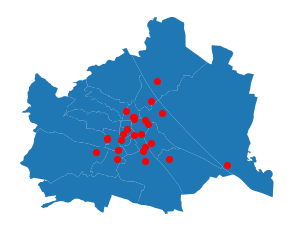

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
district_proj.plot(ax=ax)
afro_carribean.plot(ax=ax, color='red')
plt.axis('off')
plt.show()

In [ ]:
afro_count_dist= district_geo.sindex.query_bulk(afro_carribean.geometry, predicate='within')
afro_count_dist


array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24],
       [ 4, 13,  7,  1,  7,  8,  6,  0,  6,  7,  6, 15,  1, 15, 19, 14,
        21, 19, 18,  0, 10, 16,  2,  0, 22]])

In [ ]:
afro_counts_dist= Counter(afro_count_dist[-1])
afro_dist = [afro_counts_dist[i] for i in range(district_geo.shape[0])]
print(afro_dist)
dist_stat['afro_carribean'] = afro_dist

[3, 2, 1, 0, 1, 0, 3, 3, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 1]


##### Asian

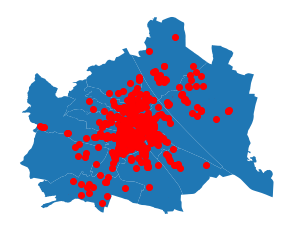

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
district_proj.plot(ax=ax)
asian.plot(ax=ax, color='red')
plt.axis('off')
plt.show()

In [ ]:
asian_count_dist= district_geo.sindex.query_bulk(asian.geometry, predicate='within')
asian_count_dist

array([[  0,   1,   2, ..., 535, 536, 537],
       [  0,   2,   3, ...,  15,  10,  13]])

In [ ]:
asian_counts_dist= Counter(asian_count_dist[-1])
asian_dist = [asian_counts_dist[i] for i in range(district_geo.shape[0])]
print(asian_dist)
dist_stat['asian'] = asian_dist

[20, 35, 41, 20, 58, 11, 34, 33, 10, 12, 21, 12, 19, 34, 19, 21, 28, 17, 12, 16, 19, 39, 7]


##### mid_east

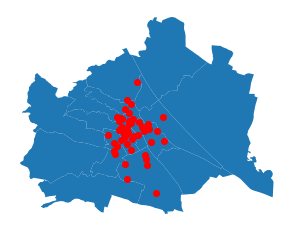

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
district_proj.plot(ax=ax)
mid_east.plot(ax=ax, color='red')
plt.axis('off')
plt.show()

In [ ]:
mid_east_count_dist= district_geo.sindex.query_bulk(mid_east.geometry, predicate='within')
mid_east_count_dist

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54],
       [ 2,  8,  3,  1,  1, 20,  1, 12,  1,  4,  7, 12,  0, 21, 21, 19,
        16,  3,  3,  2,  0, 12, 15, 15,  6,  1,  4, 15,  3,  6,  2,  9,
         5,  4,  2,  9,  4, 15,  0,  1,  7,  5, 19,  9, 15, 19, 19,  4,
        15,  9, 15,  8, 20,  0, 12]])

In [ ]:
mid_east_count_dist= Counter(mid_east_count_dist[-1])
mid_east_dist = [mid_east_count_dist[i] for i in range(district_geo.shape[0])]
print(mid_east_dist)
dist_stat['mid_east'] = mid_east_dist

[4, 6, 4, 4, 5, 2, 2, 2, 2, 4, 0, 0, 4, 0, 0, 7, 1, 0, 0, 4, 2, 2, 0]


##### South_Asian

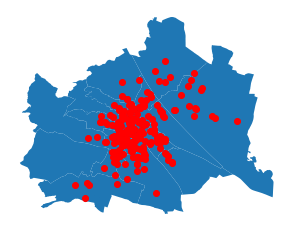

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
district_proj.plot(ax=ax)
south_asian.plot(ax=ax, color='red')
plt.axis('off')
plt.show()

In [ ]:
south_asian_count_dist= district_geo.sindex.query_bulk(south_asian.geometry, predicate='within')
south_asian_count_dist

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [ ]:
south_asian_count_dist= Counter(south_asian_count_dist[-1])
south_asian_dist = [south_asian_count_dist[i] for i in range(district_geo.shape[0])]
print(south_asian_dist)
dist_stat['south_asian'] = south_asian_dist

[8, 15, 20, 6, 15, 11, 19, 11, 6, 6, 13, 5, 7, 16, 6, 23, 11, 11, 7, 16, 11, 10, 0]


##### Latinx

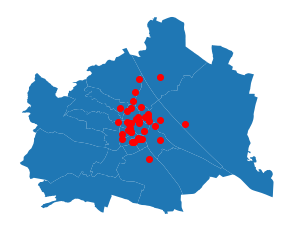

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
district_proj.plot(ax=ax)
latinx.plot(ax=ax, color='red')
plt.axis('off')
plt.show()

In [ ]:
latinx_count_dist= district_geo.sindex.query_bulk(latinx.geometry, predicate='within')
latinx_count_dist

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40],
       [ 7, 14, 10,  1,  4, 13,  3,  3,  1,  6,  6, 16, 16,  7,  6,  3,
        15, 16,  5,  2, 20, 16,  4,  4, 20, 12,  3,  2,  6,  7,  8,  8,
         3,  1, 21,  7,  7, 13, 12,  1,  7]])

In [ ]:
latinx_count_dist= Counter(latinx_count_dist[-1])
latinx_dist = [latinx_count_dist[i] for i in range(district_geo.shape[0])]
print(latinx_dist)
dist_stat['latinx'] = latinx_dist

[0, 4, 2, 5, 3, 1, 4, 6, 2, 0, 1, 0, 2, 2, 1, 1, 4, 0, 0, 0, 2, 1, 0]


##### european

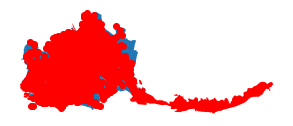

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
district_proj.plot(ax=ax)
european.plot(ax=ax, color='red')
plt.axis('off')
plt.show()

In [ ]:
european_count_dist= district_geo.sindex.query_bulk(european.geometry, predicate='within')
european_count_dist

array([[    0,     1,     2, ..., 14283, 14284, 14285],
       [    7,     0,     0, ...,     4,    12,     0]])

In [ ]:
european_count_dist= Counter(european_count_dist[-1])
european_dist = [european_count_dist[i] for i in range(district_geo.shape[0])]
print(european_dist)
dist_stat['european'] = european_dist

[689, 845, 914, 329, 1675, 379, 604, 1082, 369, 329, 448, 443, 618, 874, 771, 850, 443, 443, 396, 468, 347, 484, 453]


### Summary

In [ ]:
#calculate totals
dist_stat['total']=np.sum((dist_stat.afro_carribean, dist_stat.asian, dist_stat.mid_east, dist_stat.south_asian, dist_stat.latinx, dist_stat.european), axis=0)

In [ ]:
dist_stat.head(2)

,id,NAMEK,BEZNR,DISTRICT_CODE,FLAECHE,geometry,afro_carribean,asian,mid_east,south_asian,latinx,european,total
0,BEZIRKSGRENZEOGD.11207,Rudolfsheim-Fünfhaus,15,1150,3.918463e+06,"POLYGON ((16.32732 48.20500, 16.32535 48.20531...",3,20,4,8,0,689,724
1,BEZIRKSGRENZEOGD.11208,Neubau,7,1070,1.608248e+06,"POLYGON ((16.33873 48.20854, 16.33845 48.20858...",2,35,6,15,4,845,907


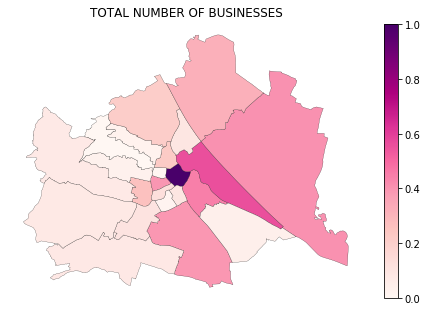

In [ ]:
#plot total
fig, ax = plt.subplots(figsize = (7,7))
dist_stat.plot('total', ax=ax, edgecolor='black', linewidth=0.2, cmap='RdPu')
plt.axis('off')
plt.title('TOTAL NUMBER OF BUSINESSES')
plt.colorbar(plt.cm.ScalarMappable(cmap='RdPu'), ax=ax, fraction=0.035)
plt.show()

In [ ]:
#get ratios
dist_stat['afro_ratio'] = np.divide(dist_stat.afro_carribean, dist_stat.total).round(4)
dist_stat['asian_ratio'] = np.divide(dist_stat.asian, dist_stat.total).round(4)
dist_stat['mid_east_ratio'] = np.divide(dist_stat.mid_east, dist_stat.total).round(4)
dist_stat['south_asian_ratio'] = np.divide(dist_stat.south_asian, dist_stat.total).round(4)
dist_stat['latinx_ratio'] = np.divide(dist_stat.latinx, dist_stat.total).round(4)
dist_stat['european_ratio'] = np.divide(dist_stat.european, dist_stat.total).round(4)

In [ ]:
dist_stat.head(2)

,id,NAMEK,BEZNR,DISTRICT_CODE,FLAECHE,geometry,afro_carribean,asian,mid_east,south_asian,latinx,european,total,afro_ratio,asian_ratio,mid_east_ratio,south_asian_ratio,latinx_ratio,european_ratio
0,BEZIRKSGRENZEOGD.11207,Rudolfsheim-Fünfhaus,15,1150,3.918463e+06,"POLYGON ((16.32732 48.20500, 16.32535 48.20531...",3,20,4,8,0,689,724,0.0041,0.0276,0.0055,0.0110,0.0000,0.9517
1,BEZIRKSGRENZEOGD.11208,Neubau,7,1070,1.608248e+06,"POLYGON ((16.33873 48.20854, 16.33845 48.20858...",2,35,6,15,4,845,907,0.0022,0.0386,0.0066,0.0165,0.0044,0.9316


##### Plot ratios individuals

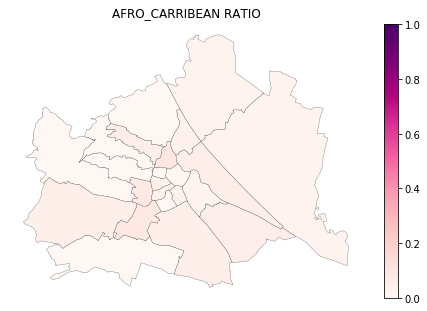

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
dist_stat.plot('afro_ratio', ax=ax, edgecolor='black',vmin=0, vmax=0.05, linewidth=0.2, cmap='RdPu')
plt.axis('off')
plt.title('AFRO_CARRIBEAN RATIO')
plt.colorbar(plt.cm.ScalarMappable(cmap='RdPu'), ax=ax, fraction=0.035)
plt.show()

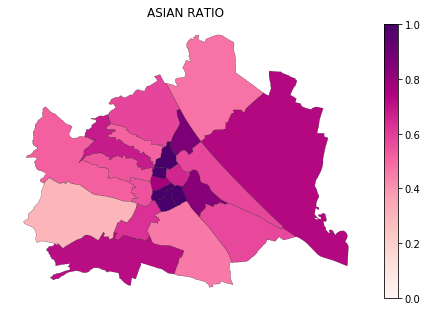

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
dist_stat.plot('asian_ratio', ax=ax, edgecolor='black', vmin=0, vmax=0.05, linewidth=0.2, cmap='RdPu')
plt.axis('off')
plt.title('ASIAN RATIO')
plt.colorbar(plt.cm.ScalarMappable(cmap='RdPu'), ax=ax, fraction=0.035)
plt.show()

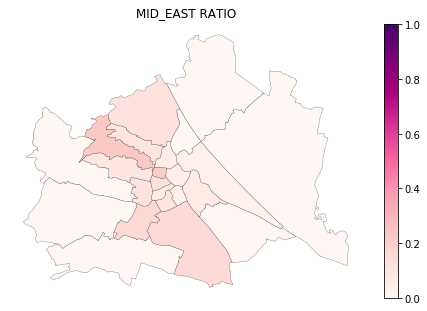

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
dist_stat.plot('mid_east_ratio', ax=ax, edgecolor='black', vmin=0, vmax=0.05, linewidth=0.2, cmap='RdPu')
plt.axis('off')
plt.title('MID_EAST RATIO')
plt.colorbar(plt.cm.ScalarMappable(cmap='RdPu'), ax=ax, fraction=0.035)
plt.show()

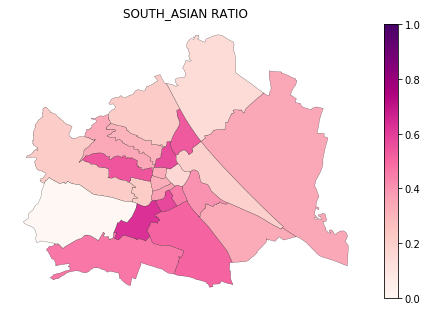

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
dist_stat.plot('south_asian_ratio', ax=ax, edgecolor='black', vmin=0, vmax=0.05, linewidth=0.2, cmap='RdPu')
plt.axis('off')
plt.title('SOUTH_ASIAN RATIO')
plt.colorbar(plt.cm.ScalarMappable(cmap='RdPu'), ax=ax, fraction=0.035)
plt.show()

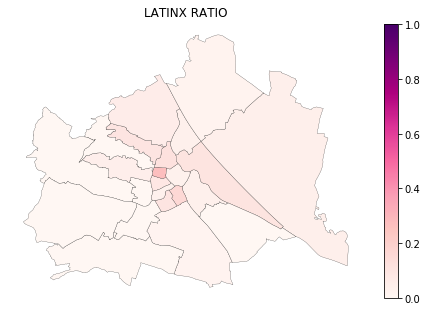

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
dist_stat.plot('latinx_ratio', ax=ax, edgecolor='black', vmin=0, vmax=0.05, linewidth=0.2, cmap='RdPu')
plt.axis('off')
plt.title('LATINX RATIO')
plt.colorbar(plt.cm.ScalarMappable(cmap='RdPu'), ax=ax, fraction=0.035)
plt.show()

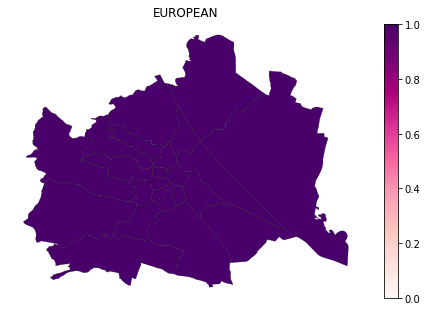

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
dist_stat.plot('european_ratio', ax=ax, edgecolor='black', vmin=0, vmax=0.05, linewidth=0.2, cmap='RdPu')
plt.axis('off')
plt.title('EUROPEAN')
plt.colorbar(plt.cm.ScalarMappable(cmap='RdPu'), ax=ax, fraction=0.035)
plt.show()

##### Plot all ratios at once

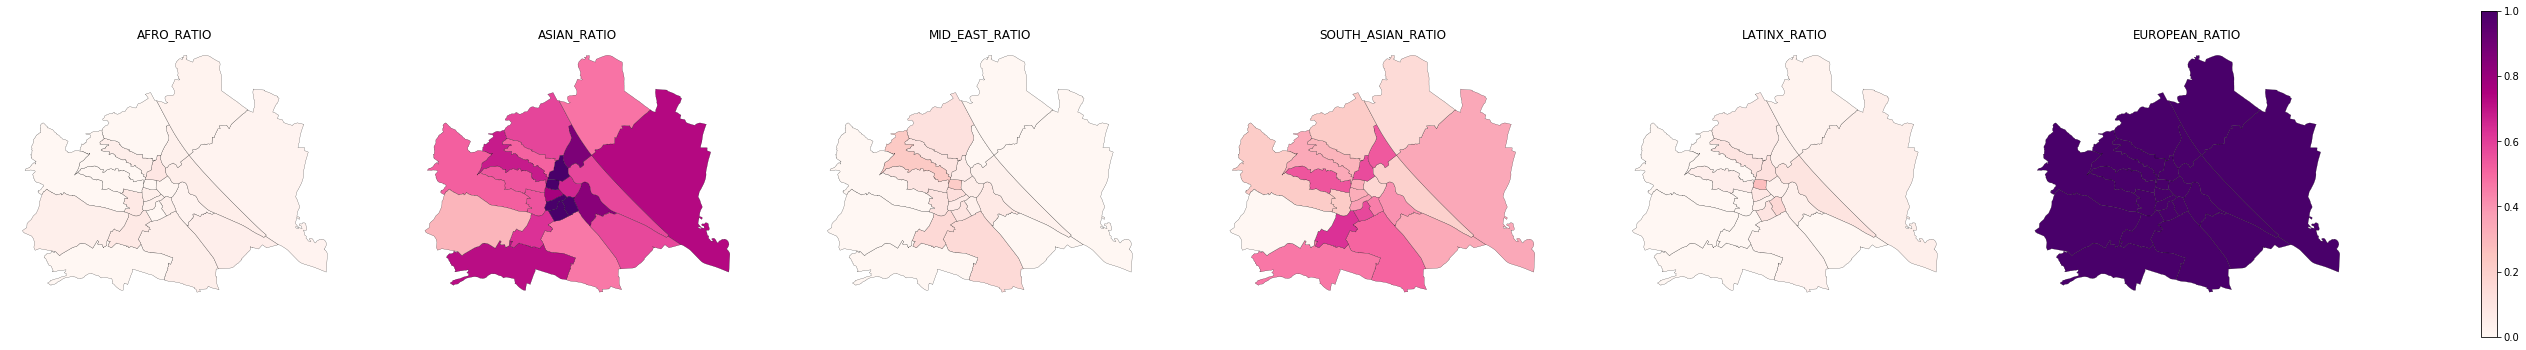

In [ ]:
ethnicities = ['afro_ratio', 'asian_ratio', 'mid_east_ratio', 'south_asian_ratio', 'latinx_ratio', 'european_ratio']
fig, ax = plt.subplots(1,6,figsize=(45,6))
for i in range(6):
  dist_stat.plot(ethnicities[i], ax=ax[i], edgecolor='black', vmin=0, vmax=0.05, linewidth=0.2, cmap='RdPu')
  ax[i].axis('off')
  ax[i].set_title(ethnicities[i].upper())
plt.colorbar(plt.cm.ScalarMappable(cmap='RdPu'), ax=ax, fraction=0.015)
plt.show()

##### Ethnic Diversity Index

In [ ]:
ethnicity_district_ratio = dist_stat.loc[:, 'afro_ratio':'european_ratio']

In [ ]:
#get ratios
ethnicity_district_ratio = ethnicity_district_ratio.loc[:,'afro_ratio':'european_ratio'].mul(100)

In [ ]:
ethnicity_district_ratio.head()

,afro_ratio,asian_ratio,mid_east_ratio,south_asian_ratio,latinx_ratio,european_ratio
0,0.41,2.76,0.55,1.10,0.00,95.17
1,0.22,3.86,0.66,1.65,0.44,93.16
2,0.10,4.18,0.41,2.04,0.20,93.08
3,0.00,5.49,1.10,1.65,1.37,90.38
4,0.06,3.30,0.28,0.85,0.17,95.33


In [ ]:
from math import exp
from math import log

In [ ]:
def div_ind(row):
  '''Measures diversity index (Hills Number) of a population. 
  Takes in the row of the dataframe with the diversity 
  ratios and returns a diversity index value.
  
  args
  row     : row in a dataframe
  q       : diversity sensitivity value
  
  returns : diversity index'''
  q = 0.5
  e = 2.71828183
  def power(i):
    return i**q
  def power2(i):
    return i *(log(i,e))

  if q == 0:
    v = sum(power2(row.afro_ratio), power2(row.asian_ratio), power2(row.mid_east_ratio), power2(row.south_asian_ratio), power2(row.latinx_ratio), power2(row.european_ratio)) * -1
    v = exp(v)
    return v

  else:
    v = power(row.afro_ratio) + power(row.asian_ratio) + power(row.mid_east_ratio) + power(row.south_asian_ratio) +  power(row.latinx_ratio)+ power(row.european_ratio)
    v = v ** (1/(1-q))
    return v


In [ ]:
ethnicity_district_ratio['diversity_index'] = ethnicity_district_ratio.apply(div_ind, axis=1)/100
ethnicity_district_ratio['geometry'] = dist_stat.geometry

In [ ]:
df_div_index = dist_stat.loc[:,['NAMEK','DISTRICT_CODE'] ]

In [ ]:
df_div_index = df_div_index.join(ethnicity_district_ratio)

In [ ]:
df_div_index = df_div_index.rename(columns = {'NAMEK':'District', 'BEZNR':'Ref #', 'DISTRICT_CODE':'District_Code', 'latinx_ratio': 'latin_american_ratio', 'european_ratio':'european_origin_ratio'})

In [ ]:
df_div_index.head(22)

,District,District_Code,afro_ratio,asian_ratio,mid_east_ratio,south_asian_ratio,latin_american_ratio,european_origin_ratio,diversity_index,geometry
0,Rudolfsheim-Fünfhaus,1150,0.41,2.76,0.55,1.10,0.00,95.17,1.917554,"POLYGON ((16.32732 48.20500, 16.32535 48.20531..."
1,Neubau,1070,0.22,3.86,0.66,1.65,0.44,93.16,2.204015,"POLYGON ((16.33873 48.20854, 16.33845 48.20858..."
2,Landstraße,1030,0.10,4.18,0.41,2.04,0.20,93.08,2.109565,"POLYGON ((16.39662 48.20739, 16.39658 48.20758..."
3,Josefstadt,1080,0.00,5.49,1.10,1.65,1.37,90.38,2.357366,"POLYGON ((16.34915 48.21516, 16.34895 48.21518..."
4,Innere Stadt,1010,0.06,3.30,0.28,0.85,0.17,95.33,1.873795,"POLYGON ((16.37264 48.21662, 16.37245 48.21676..."
5,Ottakring,1160,0.00,2.72,0.50,2.72,0.25,93.81,2.013887,"POLYGON ((16.27621 48.22704, 16.27612 48.22703..."
6,Alsergrund,1090,0.45,5.11,0.30,2.85,0.60,90.69,2.391661,"POLYGON ((16.36165 48.23192, 16.36164 48.23194..."
7,Leopoldstadt,1020,0.26,2.90,0.18,0.97,0.53,95.16,1.989510,"POLYGON ((16.40345 48.23192, 16.40266 48.23256..."
8,Währing,1180,0.26,2.56,0.51,1.54,0.51,94.62,2.104367,"POLYGON ((16.29502 48.24961, 16.29484 48.24964..."
9,Hernals,1170,0.00,3.42,1.14,1.71,0.00,93.73,1.933804,"POLYGON ((16.28516 48.25680, 16.28515 48.25685..."


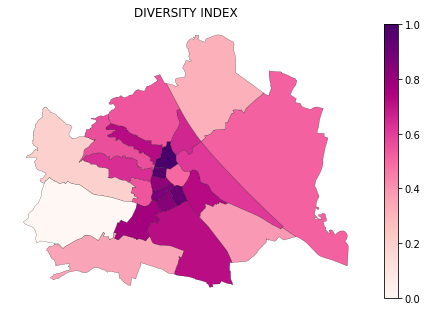

In [ ]:
#plot total
fig, ax = plt.subplots(figsize = (7,7))
df_div_index.plot('diversity_index', ax=ax, edgecolor='black', linewidth=0.2, cmap='RdPu')
plt.axis('off')
plt.title('DIVERSITY INDEX')
plt.colorbar(plt.cm.ScalarMappable(cmap='RdPu'), ax=ax, fraction=0.035)
plt.show()

## **Gender**

In [ ]:
lgbtq= osm_poi[osm_poi['lgbtq_friendly']==True]
print(lgbtq.shape)
lgbtq.head()

(20, 24)


,element_type,osmid,name,addr:street,type,amenity,leisure,shop,tourism,cuisine,...,asian,mid_east,south_asian,latinx,european,muslim_friendly,jewish,buddhist,wheelchair,geometry
412,node,353282827,Why Not - Clubdiskothek,Tiefer Graben,wine_dine,nightclub,None,None,None,None,...,False,False,False,False,True,False,False,False,False,POINT (16.36857 48.21252)
600,node,423005412,Gugg,Heumühlgasse,wine_dine,cafe,None,None,None,None,...,False,False,False,False,True,False,False,False,False,POINT (16.36179 48.19623)
722,node,444884075,SMartCafé,None,wine_dine,cafe,None,None,None,None,...,False,False,False,False,True,True,False,False,False,POINT (16.35888 48.19856)
916,node,637822653,Café Savoy,Linke Wienzeile,wine_dine,cafe,None,None,None,austrian;regional,...,False,False,False,False,True,True,False,False,False,POINT (16.36011 48.19762)
1605,node,1439055403,Sixta,None,wine_dine,restaurant,None,None,None,austrian;diner;regional,...,False,False,False,False,True,True,False,False,False,POINT (16.35953 48.19394)


In [ ]:
lgbtq_vienna = lgbtq.loc[:, ['name', 'geometry']]

## **Export Geojsons**


In [ ]:
afro_carribean.to_file(root+'/div_afro_carribean_heatmap', driver ='GeoJSON')
asian.to_file(root+'/div_asian_heatmap', driver='GeoJSON')
mid_east.to_file(root+'/div_mid_east_heatmap', driver='GeoJSON')
south_asian.to_file(root+'/div_south_asian_heatmap', driver='GeoJSON')
latinx.to_file(root+'/div_latin_american_heatmap', driver='GeoJSON')
european.to_file(root+'/div_european_origin_heatmap', driver='GeoJSON')
lgbtq_vienna.to_file(root+'/div_lgbtq_heatmap.geojson', driver='GeoJSON')
df_div_index.to_file(root+'/div_ethinic_diversity_index_per_district', driver = 'GeoJSON')